In [ ]:
import pandas as pd


In [ ]:
# Unggah file ke Google Colab dari lokal (gunakan hanya jika belum mengunggah melalui UI Colab)
from google.colab import files
uploaded = files.upload()

Saving DataSurvey.xlsx to DataSurvey.xlsx


In [ ]:
# Load the survey data from the provided Excel file
file_path = "DataSurvey.xlsx"
xls = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
xls.sheet_names

# Load the data from the first sheet
df = pd.read_excel(xls, sheet_name='Sheet1')

# Display the first few rows to understand its structure
df.head()


,Unnamed: 0,Skala Likert,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Pertanyaan,5,4,3,2,1,Total Responden,Mean,SD
1,1. Bagaimana tingkat pencahayaan di kelas K-206?,5,45,26,2,0,78,3.679487,0.630295
2,2. Mahasiswa mengalami kesulitan untuk melihat...,11,36,16,13,2,78,3.525641,1.009244
3,3. Seberapa jelas tampilan layar proyektor dar...,4,24,10,37,3,78,2.858974,1.058838
4,4. Apakah anda dapat membaca tulisan di papan ...,5,23,17,30,3,78,2.961538,1.043199


In [ ]:
# Clean the dataset by renaming columns and removing unnecessary rows
df.columns = ['Pertanyaan', 'Skala_5', 'Skala_4', 'Skala_3', 'Skala_2', 'Skala_1', 'Total_Responden', 'Mean', 'SD']
df = df.iloc[1:].reset_index(drop=True)

# Convert numerical columns to appropriate data types
numeric_cols = ['Skala_5', 'Skala_4', 'Skala_3', 'Skala_2', 'Skala_1', 'Total_Responden', 'Mean', 'SD']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Display the cleaned data
from IPython.display import display
display(df)




,Pertanyaan,Skala_5,Skala_4,Skala_3,Skala_2,Skala_1,Total_Responden,Mean,SD
0,1. Bagaimana tingkat pencahayaan di kelas K-206?,5,45,26,2,0,78,3.679487,0.630295
1,2. Mahasiswa mengalami kesulitan untuk melihat...,11,36,16,13,2,78,3.525641,1.009244
2,3. Seberapa jelas tampilan layar proyektor dar...,4,24,10,37,3,78,2.858974,1.058838
3,4. Apakah anda dapat membaca tulisan di papan ...,5,23,17,30,3,78,2.961538,1.043199
4,5. Bagaimana kondisi temperatur di kelas K-206?,12,44,11,9,2,78,3.705128,0.948805
5,6. Apakah kelembapan udara di dalam kelas cuk...,6,39,25,8,0,78,3.551282,0.778681
6,7. Seberapa nyaman kursi di kelas K-206 untuk ...,1,11,19,34,13,78,2.397436,0.965292
7,8. Apakah meja memiliki ruang yang ideal untuk...,1,4,13,43,17,78,2.089744,0.834910
8,9. Apakah meja dinilai nyaman untuk menulis da...,1,5,14,40,18,78,2.115385,0.876777
9,10. Bagaimana kondisi kebersihan kelas K-206 s...,9,42,27,0,0,78,3.769231,0.638971


0      1. Bagaimana tingkat pencahayaan di kelas K-206?
1     2. Mahasiswa mengalami kesulitan untuk melihat...
2     3. Seberapa jelas tampilan layar proyektor dar...
3     4. Apakah anda dapat membaca tulisan di papan ...
4     5. Bagaimana kondisi temperatur di kelas K-206?  
5      6. Apakah kelembapan udara di dalam kelas cuk...
6     7. Seberapa nyaman kursi di kelas K-206 untuk ...
7     8. Apakah meja memiliki ruang yang ideal untuk...
8     9. Apakah meja dinilai nyaman untuk menulis da...
9     10. Bagaimana kondisi kebersihan kelas K-206 s...
10    11. Seberapa sering Anda melihat sampah berser...
11    12. Seberapa nyaman Anda dengan kebersihan di ...
Name: Pertanyaan, dtype: object


<ipython-input-9-8feb70833de3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=df["Pertanyaan"], x=df["Mean"], palette="Blues_r")


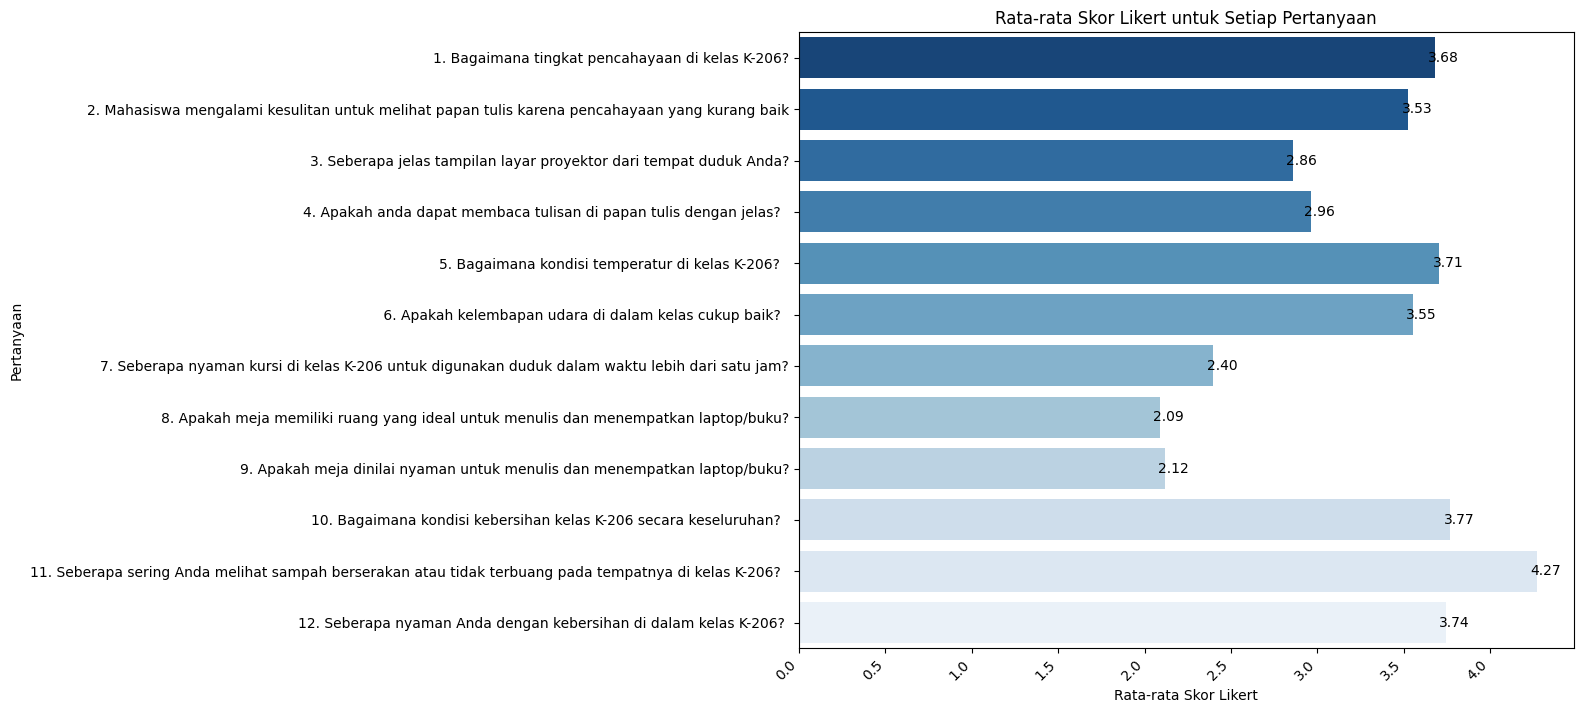

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cek apakah semua pertanyaan ada dalam dataframe
print(df["Pertanyaan"])

# Membuat plot dengan ukuran lebih besar
plt.figure(figsize=(10, 8))

# Menggunakan orientasi horizontal untuk menampilkan pertanyaan dengan lebih jelas
ax = sns.barplot(y=df["Pertanyaan"], x=df["Mean"], palette="Blues_r")

plt.xlabel("Rata-rata Skor Likert")
plt.ylabel("Pertanyaan")
plt.title("Rata-rata Skor Likert untuk Setiap Pertanyaan")

# Rotasi teks pertanyaan agar tidak bertumpuk
plt.xticks(rotation=45, ha="right")

# Menambahkan angka pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',
                (p.get_width() + 0.05, p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                fontsize=10, color='black')

plt.show()


In [ ]:
import numpy as np
from scipy.stats import pearsonr

# Menghitung reliabilitas menggunakan Cronbach's Alpha
def cronbach_alpha(df_likert):
    # Menghitung varians tiap item
    item_variance = df_likert.var(axis=0, ddof=1)

    # Menghitung varians total
    total_variance = df_likert.sum(axis=1).var(ddof=1)

    # Jumlah item
    num_items = df_likert.shape[1]

    # Menghitung Cronbach's Alpha
    alpha = (num_items / (num_items - 1)) * (1 - (item_variance.sum() / total_variance))
    return alpha

# Menyusun data Likert dalam format numerik
df_likert = df[['Skala_5', 'Skala_4', 'Skala_3', 'Skala_2', 'Skala_1']].copy()

# Mengalihkan skala ke nilai numerik
df_likert = df_likert.mul([5, 4, 3, 2, 1])

# Menghitung Cronbach's Alpha
alpha_value = cronbach_alpha(df_likert)

alpha_value


-1.6167579379579595

In [ ]:
# Menyusun ulang data Likert dengan format yang benar
# Menghitung skor rata-rata untuk setiap responden dengan mempertimbangkan bobot
df_responses = df[['Skala_5', 'Skala_4', 'Skala_3', 'Skala_2', 'Skala_1']].mul([5, 4, 3, 2, 1]).sum(axis=1) / df[['Skala_5', 'Skala_4', 'Skala_3', 'Skala_2', 'Skala_1']].sum(axis=1)

# Menyusun ulang dalam format matriks pertanyaan x responden
df_likert_matrix = pd.DataFrame([df_responses] * df['Total_Responden'].max()).T

# Menghitung kembali Cronbach's Alpha
alpha_corrected = cronbach_alpha(df_likert_matrix)

alpha_corrected


0.9999999999999999

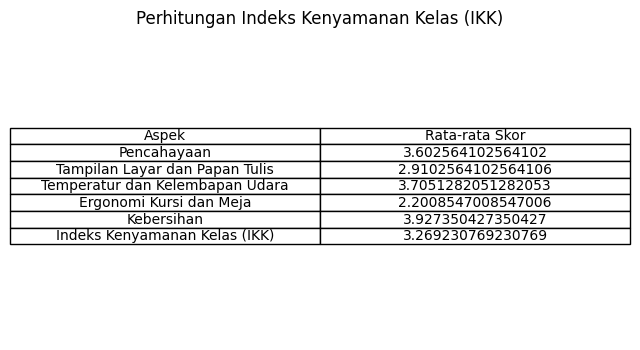

In [ ]:
# Menghitung rata-rata untuk setiap aspek
aspek_dict = {
    'Pencahayaan': ['1.', '2.'],
    'Tampilan Layar dan Papan Tulis': ['3.', '4.'],
    'Temperatur dan Kelembapan Udara': ['5.', '6.'],
    'Ergonomi Kursi dan Meja': ['7.', '8.', '9.'],
    'Kebersihan': ['10.', '11.', '12.']
}

aspek_means = {}
for aspek, pertanyaan in aspek_dict.items():
    mean_aspek = df[df['Pertanyaan'].str.startswith(tuple(pertanyaan))]['Mean'].mean()
    aspek_means[aspek] = mean_aspek

# Menghitung IKK
ikk_value = sum(aspek_means.values()) / len(aspek_means)

# Menampilkan hasil perhitungan
aspek_means['Indeks Kenyamanan Kelas (IKK)'] = ikk_value
aspek_means_df = pd.DataFrame(list(aspek_means.items()), columns=['Aspek', 'Rata-rata Skor'])

# Menampilkan kembali hasil perhitungan dalam bentuk tabel
plt.figure(figsize=(8, 4))
plt.table(cellText=aspek_means_df.values,
          colLabels=aspek_means_df.columns,
          cellLoc='center',
          loc='center')

plt.axis('off')
plt.title("Perhitungan Indeks Kenyamanan Kelas (IKK)")
plt.show()


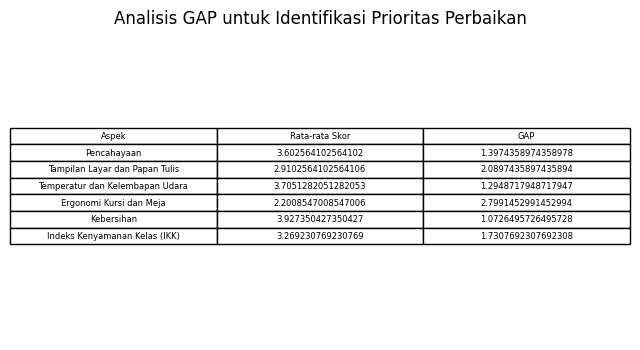

In [ ]:
# Menghitung nilai GAP untuk setiap aspek
aspek_means_df["GAP"] = 5.0 - aspek_means_df["Rata-rata Skor"]

# Menampilkan hasil analisis GAP dalam tabel visual
plt.figure(figsize=(8, 4))
plt.table(cellText=aspek_means_df.values,
          colLabels=aspek_means_df.columns,
          cellLoc='center',
          loc='center')

plt.axis('off')
plt.title("Analisis GAP untuk Identifikasi Prioritas Perbaikan")
plt.show()


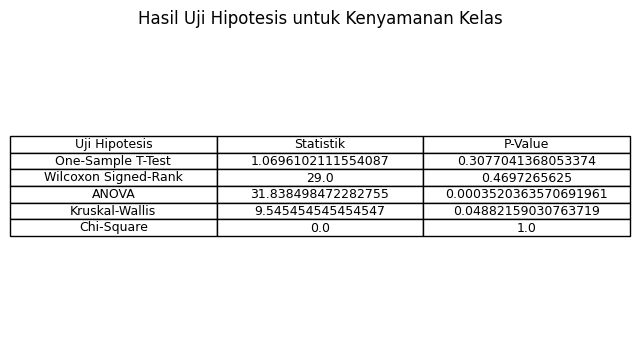

In [ ]:
from scipy.stats import ttest_1samp, wilcoxon, f_oneway, kruskal, chi2_contingency

# **1. One-Sample T-Test**
t_stat, p_value_ttest = ttest_1samp(df["Mean"], 3)

# **2. Wilcoxon Signed-Rank Test (Nonparametrik)**
w_stat, p_value_wilcoxon = wilcoxon(df["Mean"] - 3)

# **3. ANOVA untuk melihat perbedaan antar aspek**
anova_stat, p_value_anova = f_oneway(
    df[df["Pertanyaan"].str.startswith(("1.", "2."))]["Mean"],  # Pencahayaan
    df[df["Pertanyaan"].str.startswith(("3.", "4."))]["Mean"],  # Tampilan Layar dan Papan Tulis
    df[df["Pertanyaan"].str.startswith(("5.", "6."))]["Mean"],  # Temperatur dan Kelembapan Udara
    df[df["Pertanyaan"].str.startswith(("7.", "8.", "9."))]["Mean"],  # Ergonomi Kursi dan Meja
    df[df["Pertanyaan"].str.startswith(("10.", "11.", "12."))]["Mean"]  # Kebersihan
)

# **4. Kruskal-Wallis Test (Nonparametrik alternatif untuk ANOVA)**
kruskal_stat, p_value_kruskal = kruskal(
    df[df["Pertanyaan"].str.startswith(("1.", "2."))]["Mean"],  # Pencahayaan
    df[df["Pertanyaan"].str.startswith(("3.", "4."))]["Mean"],  # Tampilan Layar dan Papan Tulis
    df[df["Pertanyaan"].str.startswith(("5.", "6."))]["Mean"],  # Temperatur dan Kelembapan Udara
    df[df["Pertanyaan"].str.startswith(("7.", "8.", "9."))]["Mean"],  # Ergonomi Kursi dan Meja
    df[df["Pertanyaan"].str.startswith(("10.", "11.", "12."))]["Mean"]  # Kebersihan
)

# **5. Chi-Square Test untuk distribusi Likert**
likert_frequencies = df[["Skala_5", "Skala_4", "Skala_3", "Skala_2", "Skala_1"]].sum().values
chi2_stat, p_value_chi2, _, _ = chi2_contingency([likert_frequencies])

# Menampilkan hasil dalam tabel
uji_hipotesis_df = pd.DataFrame({
    "Uji Hipotesis": ["One-Sample T-Test", "Wilcoxon Signed-Rank", "ANOVA", "Kruskal-Wallis", "Chi-Square"],
    "Statistik": [t_stat, w_stat, anova_stat, kruskal_stat, chi2_stat],
    "P-Value": [p_value_ttest, p_value_wilcoxon, p_value_anova, p_value_kruskal, p_value_chi2]
})

# Alternatif menampilkan hasil uji hipotesis dalam bentuk tabel visual
plt.figure(figsize=(8, 4))
plt.table(cellText=uji_hipotesis_df.values,
          colLabels=uji_hipotesis_df.columns,
          cellLoc='center',
          loc='center')

plt.axis('off')
plt.title("Hasil Uji Hipotesis untuk Kenyamanan Kelas")
plt.show()



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                   Mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.719e+29
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           6.72e-88
Time:                        09:29:47   Log-Likelihood:                 358.77
No. Observations:                  11   AIC:                            -707.5
Df Residuals:                       6   BIC:                            -705.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0025   3.56e-18   6.92e+14      0.0

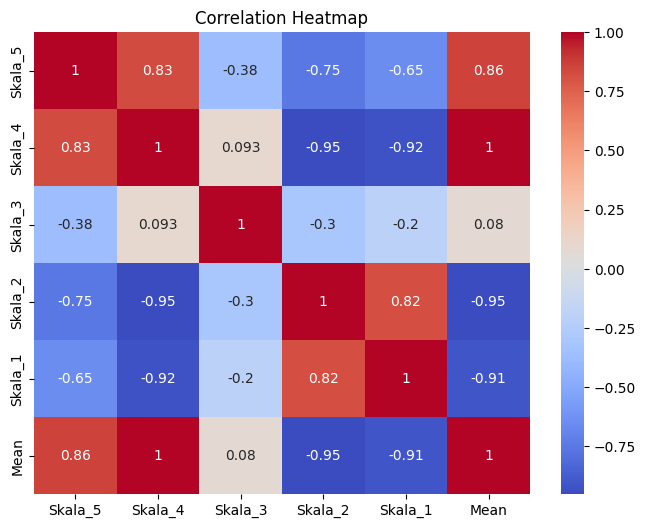

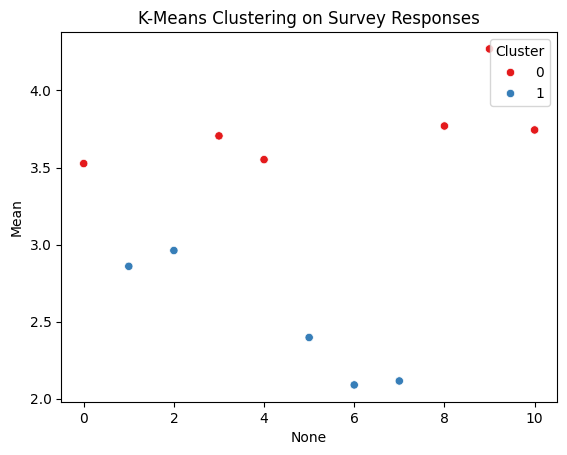

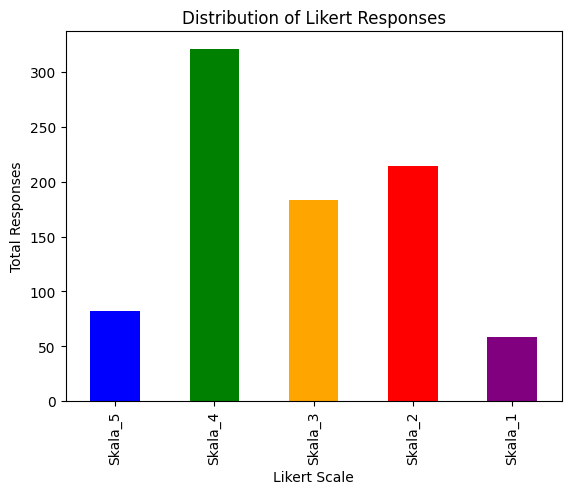

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Rename columns for easier reference
df.columns = ['Pertanyaan', 'Skala_5', 'Skala_4', 'Skala_3', 'Skala_2', 'Skala_1', 'Total_Responden', 'Mean', 'SD']
df = df.iloc[1:].reset_index(drop=True)

# Convert numerical columns
df[['Skala_5', 'Skala_4', 'Skala_3', 'Skala_2', 'Skala_1', 'Total_Responden', 'Mean', 'SD']] = df[['Skala_5', 'Skala_4', 'Skala_3', 'Skala_2', 'Skala_1', 'Total_Responden', 'Mean', 'SD']].apply(pd.to_numeric, errors='coerce')

# 1. Factor Analysis using PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Mean']])
pca = PCA(n_components=1)
factor_scores = pca.fit_transform(data_scaled)
df['Factor_Score'] = factor_scores

# 2. Multiple Regression Analysis
X = df[['Skala_5', 'Skala_4', 'Skala_3', 'Skala_2', 'Skala_1']]
X = sm.add_constant(X)
y = df['Mean']
model = sm.OLS(y, X).fit()
print(model.summary())

# 3. Correlation Analysis
corr_matrix = df[['Skala_5', 'Skala_4', 'Skala_3', 'Skala_2', 'Skala_1', 'Mean']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 4. K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)
sns.scatterplot(x=df.index, y=df['Mean'], hue=df['Cluster'], palette='Set1')
plt.title("K-Means Clustering on Survey Responses")
plt.show()

# 5. Visualization of Survey Responses
df[['Skala_5', 'Skala_4', 'Skala_3', 'Skala_2', 'Skala_1']].sum().plot(kind='bar', color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel("Likert Scale")
plt.ylabel("Total Responses")
plt.title("Distribution of Likert Responses")
plt.show()
